In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

In [2]:
from web.detection.mouse_events.feature_extract import extract_feature

In [3]:
import glob

train = glob.glob("data/*/*.csv")
train_data = []
for i, file in enumerate(train):
    print("Process {i}/{num} request".format(i=i, num=len(train)))
    df = pd.read_csv(file)
    label = 1 if 'not_bot' in file else 0
    if len(df) <= 5:
        continue
    features = extract_feature(df)
    features = np.append( features , np.array([label]) )
    train_data.append(features)

Process 0/8452 request
Process 1/8452 request
Process 2/8452 request
Process 3/8452 request
Process 4/8452 request
Process 5/8452 request
Process 6/8452 request
Process 7/8452 request
Process 8/8452 request
Process 9/8452 request
Process 10/8452 request
Process 11/8452 request
Process 12/8452 request
Process 13/8452 request
Process 14/8452 request
Process 15/8452 request
Process 16/8452 request
Process 17/8452 request
Process 18/8452 request
Process 19/8452 request
Process 20/8452 request
Process 21/8452 request
Process 22/8452 request
Process 23/8452 request
Process 24/8452 request
Process 25/8452 request
Process 26/8452 request
Process 27/8452 request
Process 28/8452 request
Process 29/8452 request
Process 30/8452 request
Process 31/8452 request
Process 32/8452 request
Process 33/8452 request
Process 34/8452 request
Process 35/8452 request
Process 36/8452 request
Process 37/8452 request
Process 38/8452 request
Process 39/8452 request
Process 40/8452 request
Process 41/8452 request
Pr

In [4]:
df = pd.DataFrame(data=train_data, columns=['Góc di chuyển trung bình', 'Tốc độ trung bình', 'Độ lệch chuẩn của tốc độ', 'Độ cong trung bình', 'Tính hiệu quả', 'Tính đều đặn', 'Số lần đổi góc di chuyển', 'Số quãng nghỉ', 'Số sự kiện', 'Thời lượng', 'Label'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0)


,Góc di chuyển trung bình,Tốc độ trung bình,Độ lệch chuẩn của tốc độ,Độ cong trung bình,Tính hiệu quả,Tính đều đặn,Số lần đổi góc di chuyển,Số quãng nghỉ,Số sự kiện,Thời lượng,Label
0,5.348642,0.691341,1.082890,155515.083592,0.278946,0.708707,38.211229,1.0,85.0,2.012,0.0
1,4.004704,1.206372,0.568469,21082.907933,0.561160,0.828893,43.485578,1.0,38.0,2.212,0.0
2,81.100001,1.012030,0.458172,22985.859307,0.339166,0.635588,79.588047,1.0,35.0,7.033,0.0
3,-0.734647,0.844121,1.102964,223097.368455,0.318263,0.657618,36.699755,1.0,45.0,1.278,0.0
4,-60.888839,0.481193,0.919798,214454.000524,0.359391,0.825848,37.960495,1.0,108.0,3.856,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8405,11.438326,0.389016,0.548477,175491.996613,0.902528,0.932257,-13.479523,6.0,24.0,0.926,1.0
8406,28.674018,0.912757,0.738368,61522.071613,0.740632,0.799284,28.281669,4.0,45.0,0.813,1.0
8407,-14.542609,1.183331,2.589200,104055.336989,0.494118,0.972002,-8.053336,7.0,39.0,0.963,1.0
8408,46.597499,0.000000,0.000000,194584.754059,0.570535,0.466348,2.599118,24.0,57.0,5.913,1.0


In [5]:

print("Describe Dataset","\n")
print(df.describe())

Describe Dataset 

       Góc di chuyển trung bình  Tốc độ trung bình  Độ lệch chuẩn của tốc độ  \
count               8410.000000        6926.000000               6926.000000   
mean                  18.654236           1.012516                  1.292614   
std                   41.219404           4.325142                 17.239321   
min                 -127.871070           0.000000                  0.000000   
25%                   -9.011389           0.388706                  0.362830   
50%                   20.156444           0.590708                  0.608916   
75%                   47.179467           0.985249                  1.049834   
max                  168.652296         300.667093               1405.204069   

       Độ cong trung bình  Tính hiệu quả  Tính đều đặn  \
count         8410.000000    8410.000000   8410.000000   
mean         82964.307603       0.485741      0.703310   
std          63226.809093       0.309258      0.170495   
min            356.141855   

In [6]:
df.head()

,Góc di chuyển trung bình,Tốc độ trung bình,Độ lệch chuẩn của tốc độ,Độ cong trung bình,Tính hiệu quả,Tính đều đặn,Số lần đổi góc di chuyển,Số quãng nghỉ,Số sự kiện,Thời lượng,Label
0,5.348642,0.691341,1.082890,155515.083592,0.278946,0.708707,38.211229,1.0,85.0,2.012,0.0
1,4.004704,1.206372,0.568469,21082.907933,0.561160,0.828893,43.485578,1.0,38.0,2.212,0.0
2,81.100001,1.012030,0.458172,22985.859307,0.339166,0.635588,79.588047,1.0,35.0,7.033,0.0
3,-0.734647,0.844121,1.102964,223097.368455,0.318263,0.657618,36.699755,1.0,45.0,1.278,0.0
4,-60.888839,0.481193,0.919798,214454.000524,0.359391,0.825848,37.960495,1.0,108.0,3.856,0.0


(2, 5)


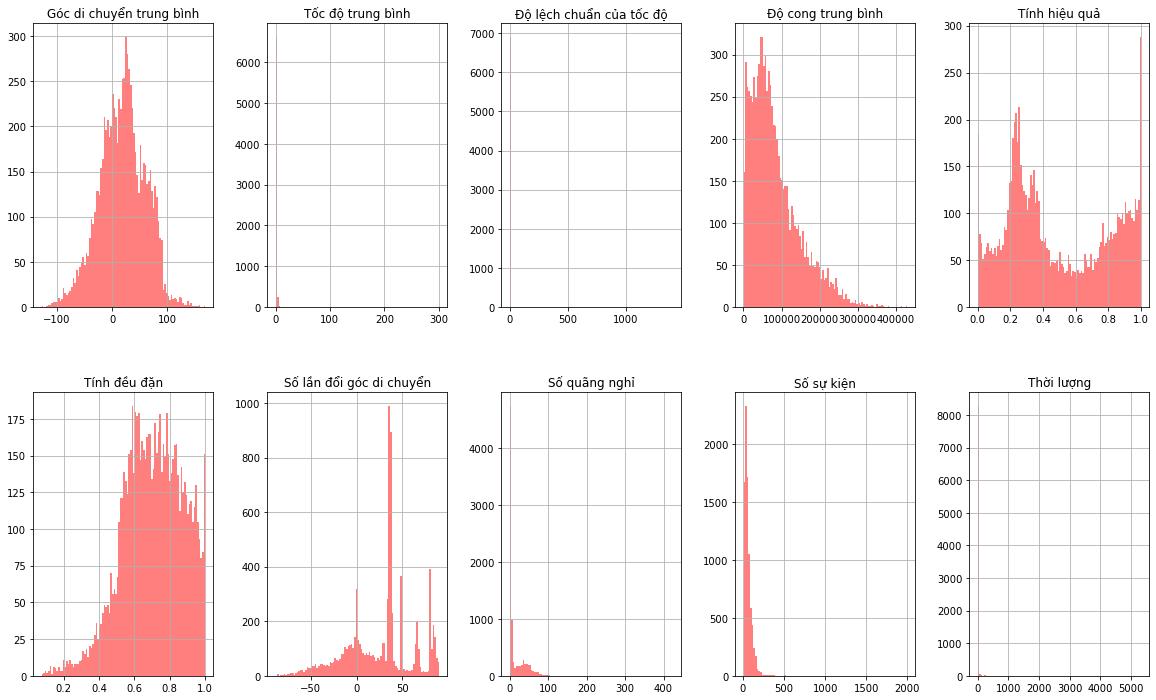

In [7]:
continous_vars=df.describe().columns

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))

print(ax.shape)
for j, col in enumerate(continous_vars[:-1]):

    df.hist(column=col, ax=ax[j//5][j%5], alpha=0.5, color='red', bins=100)

    ax[j//5][j%5].set_title(col)
plt.show()

In [8]:
df['Số sự kiện'].describe()

count    8410.000000
mean       59.670868
std        53.518785
min         6.000000
25%        29.000000
50%        47.000000
75%        76.000000
max      1998.000000
Name: Số sự kiện, dtype: float64

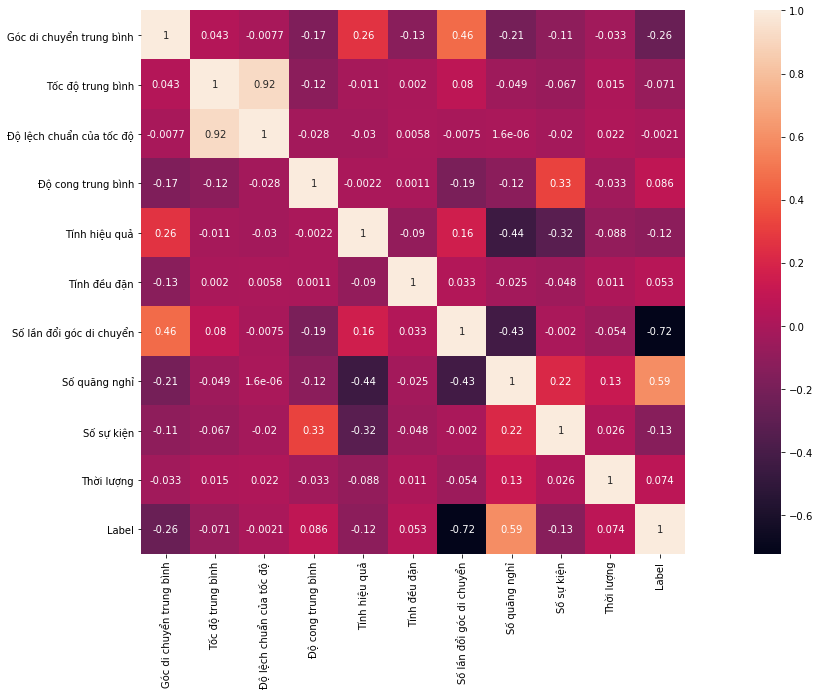

In [9]:
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

In [10]:
y = df['Label']
data_scaled = df.drop(['Label'], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=27, shuffle=True)


In [12]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [13]:
# X_train,y_train=upSample(X_train, y_train)

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
	
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
eval_set = [(X_train, y_train), (X_test, y_test)]
model = XGBClassifier(**params)
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

C:\Users\niits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[0]	validation_0-error:0.05975	validation_0-logloss:0.61757	validation_1-error:0.06421	validation_1-logloss:0.61789
[1]	validation_0-error:0.03686	validation_0-logloss:0.58433	validation_1-error:0.04043	validation_1-logloss:0.58445
[2]	validation_0-error:0.01590	validation_0-logloss:0.51800	validation_1-error:0.01724	validation_1-logloss:0.51944
[3]	validation_0-error:0.01026	validation_0-logloss:0.47376	validation_1-error:0.01427	validation_1-logloss:0.47574
[4]	validation_0-error:0.01263	validation_0-logloss:0.43136	validation_1-error:0.0

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_pred = model.predict(X_test)
prediction = [round(value) for value in y_pred]

C:\Users\niits\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [17]:
results = model.evals_result()

<Figure size 576x288 with 0 Axes>

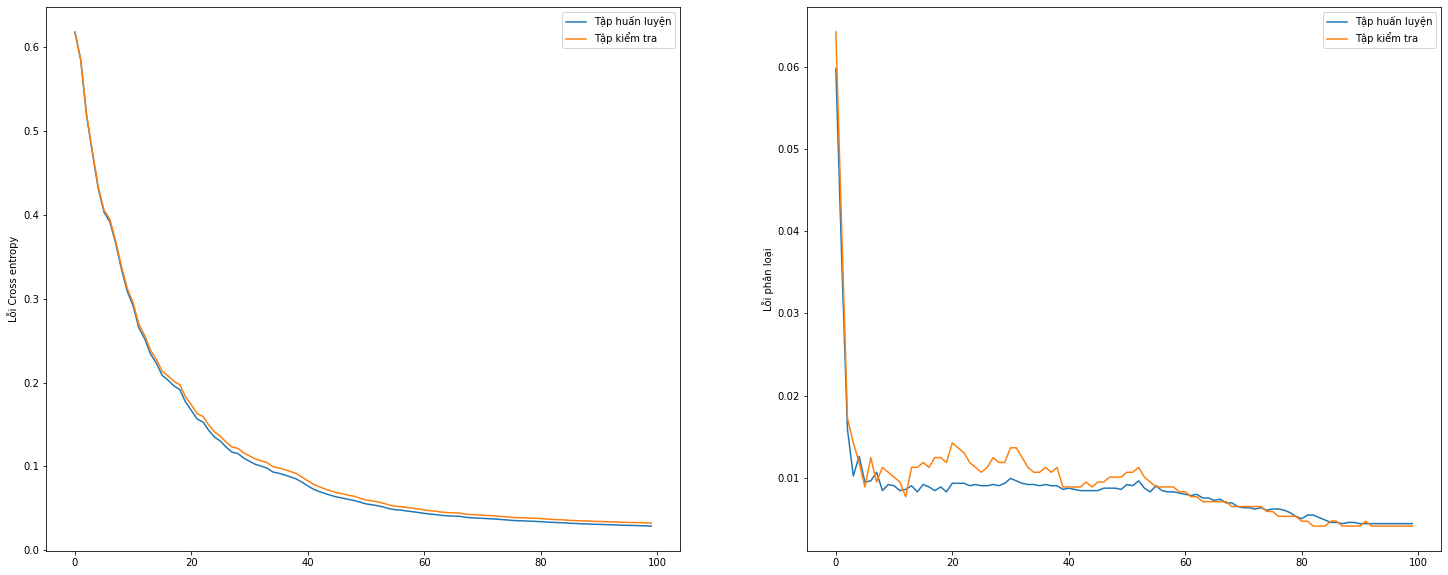

In [18]:
plt.figure(figsize=(8,4))

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(1, 2, figsize=(25,10))
ax[0].plot(x_axis, results['validation_0']['logloss'], label='Tập huấn luyện')
ax[0].plot(x_axis, results['validation_1']['logloss'], label='Tập kiểm tra')
ax[0].legend()
ax[0].set_ylabel('Lỗi Cross entropy')
# plot classification error
ax[1].plot(x_axis, results['validation_0']['error'], label='Tập huấn luyện')
ax[1].plot(x_axis, results['validation_1']['error'], label='Tập kiểm tra')
ax[1].legend()
ax[1].set_ylabel('Lỗi phân loại')
plt.show()

Confusion Matrix 



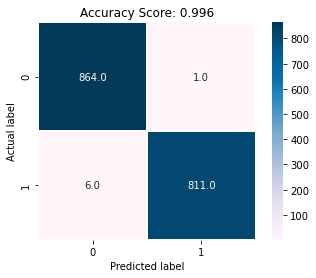

In [19]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, prediction),3) 
cm1 = cm(y_test, prediction)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [20]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [21]:
y_pred = model.predict(X_test)
prediction = [round(value) for value in y_pred]

Confusion Matrix 



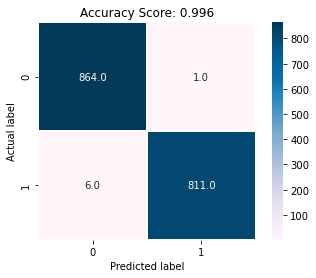

In [22]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, prediction),3) 
cm1 = cm(y_test, prediction)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [23]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)


In [24]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

<Figure size 576x288 with 0 Axes>

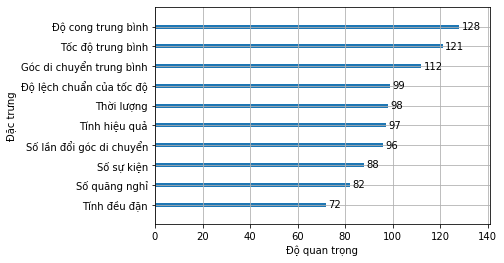

In [25]:
plt.figure(figsize=(8,4))

xgb.plot_importance(model)
plt.ylabel('Đặc trưng')
plt.xlabel('Độ quan trọng')
plt.title("")
plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


NameError: name 'xgboost' is not defined